# Learning Gate - Reto

## Audiencias en Fútbol

### Data Science - Neworks Analytics Concepts

## Introducción 

Una parte importante de los equipos profesionales de fútbol es la forma en la que el mercado de jugadores se lleva a cabo. SportX está haciendo un  estudio sobre la forma en la que los jugadores se mueven.

## Objetivo

Hacer un análisis de una red relacionada al fútbol, en este caso a la compra y venta de jugadores en equipos profesionales.
- Aplicar algunas de las formas de calcular centralidad.
- Obtener algunas de las características de la red presentada, como es el agrupamiento, las distancias, el diámetro y el radio.

## Importing Libraries and Preparing Data to be Processed

### Importing Libraries

In [1]:
import os, math
import networkx as nx 
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Loading Data

#### Data Description:

Con los datos que están en el archivo DatosVentas.txt, que contiene una matriz de adyacencias. Los vértices representan equipos de fútbol y las aristas representan la compra – venta de jugadores entre los equipos. La idea es estudiar un poco el mercado, estableciendo si hay agrupamientos y nodos centrales, ya que quizás hay equipos que preparan a jugadores y después los venden, o equipos que se forman exclusivamente con la compra de jugadores. Debes hacer lo siguiente:

- ***Adjacency Matrix***

In [2]:
Mat_Adj = []
file_path = os.path.join(os.getcwd(), 'Data', 'NwtworkFutbol.txt')

with open(file_path) as f:
   for i, line in enumerate(f):
        if i > 1:
            Mat_Adj.append([int(val) for val in line.replace('\n', '').split(',')])

Mat_Adj = pd.DataFrame(Mat_Adj, index=['Team '+str(n) for n in np.arange(1,11)], columns=['Team '+str(n) for n in np.arange(1,11)])
display(Mat_Adj)

,Team 1,Team 2,Team 3,Team 4,Team 5,Team 6,Team 7,Team 8,Team 9,Team 10
Team 1,0,1,0,0,0,0,0,0,0,0
Team 2,1,0,0,1,0,0,0,0,0,0
Team 3,0,0,0,1,0,0,0,0,0,0
Team 4,0,1,1,0,1,1,1,0,1,0
Team 5,0,0,0,1,0,0,1,1,0,0
Team 6,0,0,0,1,0,0,0,0,1,0
Team 7,0,0,0,1,1,0,0,1,1,0
Team 8,0,0,0,0,1,0,1,0,0,1
Team 9,0,0,0,1,0,1,1,0,0,1
Team 10,0,0,0,0,0,0,0,1,1,0


- ***Displaying the Players Sales Networks***

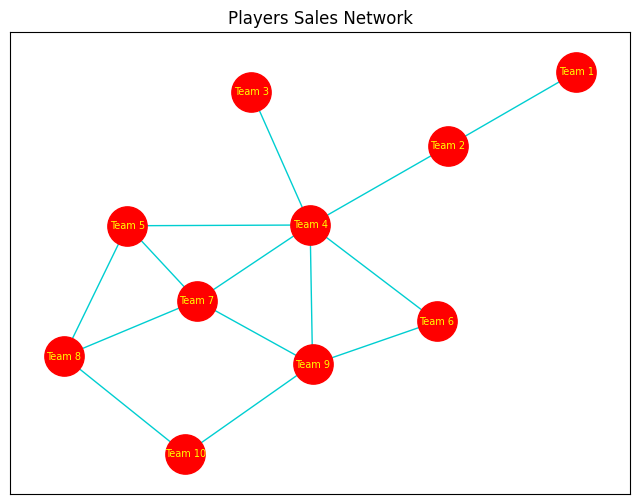

In [3]:
g = nx.Graph(pd.DataFrame(Mat_Adj, index=['Team '+str(n) for n in np.arange(1,11)], columns=['Team '+str(n) for n in np.arange(1,11)]))
fig, ax = plt.subplots(1,1 ,figsize=(8,6))
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos, with_labels=True, node_size=800, ax=ax, node_color='r', edge_color='darkturquoise',
                 font_size=7, font_color='yellow')
ax.set_title('Players Sales Network');

## Network Characteristics

### Nodes Degrees

In [4]:
NodesDegress = pd.DataFrame(pd.DataFrame(g.degree(['Team '+str(n) for n in np.arange(1,11)]))).rename(columns={0:'', 1:'Degrees'}).set_index('').T
NodesDegress

,Team 1,Team 2,Team 3,Team 4,Team 5,Team 6,Team 7,Team 8,Team 9,Team 10
Degrees,1,2,1,6,3,2,4,3,4,2


### Degrees Sequence

In [5]:
Degrees_Sequence = pd.DataFrame(g.degree(['Team '+str(n) for n in np.arange(1,11)])).rename(columns={0:'', 1:'Degrees_Sequence'}).sort_values('Degrees_Sequence', ascending=False).set_index('').T
Degrees_Sequence

,Team 4,Team 7,Team 9,Team 5,Team 8,Team 2,Team 6,Team 10,Team 1,Team 3
Degrees_Sequence,6,4,4,3,3,2,2,2,1,1


### Network Eccentricity (Radius and Diameter)

#### Network Eccentricity

In [6]:
Eccentricity = pd.DataFrame(data=dict(nx.eccentricity(g)).values(), index=dict(nx.eccentricity(g)).keys())
Eccentricity.rename(columns={0:'Eccentricity'}).T

,Team 1,Team 2,Team 3,Team 4,Team 5,Team 6,Team 7,Team 8,Team 9,Team 10
Eccentricity,4,3,3,2,3,3,3,4,3,4


- ***Network Radius and Diameter***

In [7]:
pd.DataFrame({'Radius':[nx.radius(g)], 'Diameter':[nx.diameter(g)]}).T.rename(columns={0:'Distance'})

,Distance
Radius,2
Diameter,4


### Distribution Degress

In [9]:
Distribution_Degress = pd.DataFrame((NodesDegress.iloc[0,:].value_counts()/10).sort_index()).rename(columns={'count':'Distribution_p'})
Distribution_Degress

,Distribution_p
Degrees,
1,0.2
2,0.3
3,0.2
4,0.2
6,0.1


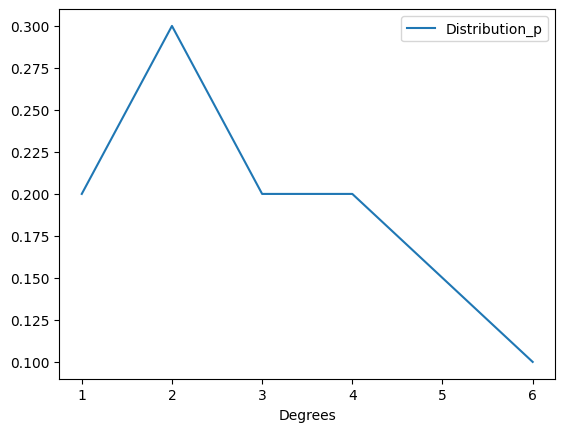

In [10]:
Distribution_Degress.plot();

### Clustering Coefficients

In [11]:
nodes2review = ['Team '+str(n) for n in [4,7,9]]

for node in nodes2review:
    neighbors = [n for n in nx.neighbors(g,node)]
    neighbors_links = []
    if len(neighbors)>1:
        for node1 in neighbors:
            for node2 in neighbors:
                if g.has_edge(node1, node2):
                    neighbors_links.append((node1, node2))
        clus_coef = (2*len(neighbors_links)/2)/(len(neighbors)*(len(neighbors)-1))
        print('Clustering Coefficient ({}) = {}'.format(node, clus_coef))

Clustering Coefficient (Team 4) = 0.2
Clustering Coefficient (Team 7) = 0.5
Clustering Coefficient (Team 9) = 0.3333333333333333


### Betweenness Centrality

In [12]:
for node2analyze in nodes2review:
    shortest_pahts = {}
    for node1 in g.nodes():
        for node2 in g.nodes():
            if (node1 != node2) and (node1 != node2analyze) and (node2 != node2analyze):
                if node2analyze in nx.shortest_path(g, source=node1, target=node2):
                    shortest_path = nx.shortest_path(g, source=node1, target=node2)
                    #print('shortest_path', shortest_path, 'len', len(shortest_path))
                    simple_paths = []
                    for path in list(nx.all_simple_paths(g, source=shortest_path[0], target=shortest_path[-1])):
                        if len(path)==len(shortest_path):
                            simple_paths.append(path)
                            
                    #print('    simple_paths= ', simple_paths, len(simple_paths))                
                            
                    temp = shortest_path
                    #temp.sort()
                    if str(temp) not in shortest_pahts.keys():
                        shortest_pahts[str(temp)] = [1, len(simple_paths)]
                    else:
                        shortest_pahts[str(temp)] = [shortest_pahts[str(temp)][0]+1, len(simple_paths)]
    
    betweenness_centrality = 0
    for key in shortest_pahts.keys():
        betweenness_centrality += shortest_pahts[key][0]/shortest_pahts[key][1]
    print('Betweenness Centrality ({}) = {}'.format(node2analyze, betweenness_centrality))


Betweenness Centrality (Team 4) = 41.5
Betweenness Centrality (Team 7) = 1.0
Betweenness Centrality (Team 9) = 10.0


## Conclusion

# FIN